# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

En este proyecto vamos a determinar cual de los planes (Surf y Ultimate) aporta más ingresos a la empresa Megaline. para desarrollar el trabajo llevaremos a cabo los siguientes pasos:

**1. Exploración de datos:**

* Cargar los datos y explorarlos.
* Comprender la estructura, columnas, y valores de los datos.

**2. Limpieza y preprocesamiento:**

* Verificar valores nulos o inconsistencias.
* Asegurarnos de que las columnas tengan los tipos de datos correctos.

**3. Analiza los datos:**

* Analizar el comportamiento de los clientes (llamadas, mensajes, datos, etc.).
* calcularemos variables estadisticas.
* graficaremos histogramas para tomar decisiones y mirar las distribuciones de nuestros datos. 

**4. Haremos pruebas de hipótesis:**

**5. Informe final:**

* Resumir los hallazgos con recomendaciones.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt




## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

# Información general sobre el DataFrame df_plans
df_plans.info()

# Resumen estadístico del DataFrame df_plans
df_plans.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surf
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142,NaN
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000,NaN
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000,NaN
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000,NaN


In [4]:
# Imprime una muestra de los datos para las tarifas
# Imprimir una muestra aleatoria de 5 filas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


hay 8 columnas, de las cuales 5 esta en formato int64, 2 columnas float64 y una columna tipo object, las cuales tienes bien asignado el tipo de dato, no tiene datos nulos; por lo cual yo dejaria el dataframe como esta. 

## Corregir datos

No considero necesario hacer cambios en los datos ya que los mismos no muestran errores

## Enriquecer los datos

puede ser necesario calcular el valor del mb en cada plan, por este motivo crearemos una columna con esa información. 

In [5]:
# Calcular el costo por MB incluido en cada plan
df_plans['usd_per_mb_included'] = df_plans['usd_monthly_pay'] / df_plans['mb_per_month_included']
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb_included
0,50,15360,500,20,10,0.03,0.03,surf,0.001302
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.002279


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
# Información general sobre el DataFrame df_users
df_users.info()

# Resumen estadístico del DataFrame df_users
df_users.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
count,500.000000,500,500,500.000000,500,500,500,34
unique,NaN,458,399,NaN,73,266,2,29
top,NaN,Seymour,Velazquez,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,surf,2018-12-18
freq,NaN,3,3,NaN,80,5,339,3
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,1249.500000,NaN,NaN,46.000000,NaN,NaN,NaN,NaN
75%,1374.250000,NaN,NaN,61.000000,NaN,NaN,NaN,NaN


In [7]:
# Imprime una muestra de datos para usuarios
df_users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
41,1041,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",2018-03-17,ultimate,NaN
383,1383,Margarito,Mccoy,52,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-10-10,ultimate,NaN
56,1056,Denis,Chandler,33,"Cincinnati, OH-KY-IN MSA",2018-03-01,surf,NaN
395,1395,Leonard,Wooten,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-19,ultimate,NaN
423,1423,Malcom,Neal,61,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-16,surf,NaN
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaN
91,1091,Taylor,Oliver,38,"Riverside-San Bernardino-Ontario, CA MSA",2018-05-04,ultimate,NaN
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaN
85,1085,Ignacio,Bennett,48,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-07-19,ultimate,NaN
359,1359,Sherley,Norris,33,"Colorado Springs, CO MSA",2018-02-08,surf,NaN


- hay 8 columnas, de las cuales 2 de ellos son enteros que son el user_id y age. 
- el resto de las columnas tienen formato object o string. de estas columnas reg_date y churn_date deberian cambiarse a formato fecha para facilitar cálculos como la duración del servicio. 
- La edad mínima es 18 y la máxima es 75, lo cual parece razonable. No hay valores fuera de rango ni nulos.
- Los valores no nulos de la colomba churn_date son pocos (34 de 500), lo que indica que la mayoría de los clientes permanecieron activos al momento de extraer los datos.

### Corregir los datos

cambiamos las columnas 'reg_date' y 'churn_date' por el formato datetime[ns]

In [8]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

Agregamos una columna para identificar los usuarios activos en el momento de extraer la información. 

In [9]:
# Crear una nueva columna 'active' que indica si el usuario está activo (True si churn_date es nulo)
df_users['active'] = df_users['churn_date'].isna()

# Confirmar el cambio
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
# Información general sobre el DataFrame df_calls
df_calls.info()

# Resumen estadístico del DataFrame df_caLLS
df_calls.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1268_481,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000


In [11]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)


,id,user_id,call_date,duration
101328,1362_65,1362,2018-05-11,7.86
126649,1451_49,1451,2018-11-26,0.00
130863,1470_312,1470,2018-08-01,0.00
117651,1411_260,1411,2018-10-13,6.71
40193,1148_52,1148,2018-12-13,2.51
53025,1191_173,1191,2018-12-07,1.38
113964,1400_306,1400,2018-10-25,0.00
102428,1363_41,1363,2018-12-18,12.80
45916,1166_99,1166,2018-11-14,0.00
76286,1270_279,1270,2018-11-03,0.00


* no hay valores nulos en ninguna de las columnas.
* call_date esta en formato object, debemos cambiarla a formato datetime.
* el promedio de duración de las llamadas es 6.75 minutos, con un rango entre 0 a 37.6 minutos. el 25% de las llamadas duran menos de 1.29 minutos, y el 75% menos de 10.69 minutos. 
* existen llamadas de duración cero (0), esto podria significar llamadas fallidas o no respondidas. investigaremos que % de todas las llamadas estan en esta duración para mirar si son significativas o si debemos excluirlas de los cálculos. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
# hallamos el porcentaje de llamadas con duración cero
zero_duration_calls = df_calls[df_calls['duration'] == 0]
zero_duration_percentage = len(zero_duration_calls) / len(df_calls) * 100
print(f"Porcentaje de llamadas con duración 0: {zero_duration_percentage:.2f}%")

# convertimos la columna call_date al formato datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

Porcentaje de llamadas con duración 0: 19.48%


### Enriquecer los datos

vamos a llevar a cabo las siguientes acciones:
1. vamos a extraer el día de la semana de la columna call_date para analizar patrones de llamadas en una nueva columna llamada call_day.
2. vamos a extraer el mes de la llamada para analizar tendencias mensuales en una nueva columna llamada call_month. 
3. vamos a redondear hacia arriba la duración de las llamadas, ya que sabemos que la compañia cobra de esta manera, en una nueva columna llamada Duration_rounded
4.  vamos a crear una nueva columna llamada call_category, para clasificar las llamadas en Corta (<5 minutos), Media (5-15 minutos), y Larga (>15 minutos).

In [13]:
# 1. Extraer el día de la semana
df_calls['call_day'] = df_calls['call_date'].dt.day_name()

# 2. Extraer el mes de la llamada
df_calls['call_month'] = df_calls['call_date'].dt.month

# 3. Redondear la duración de las llamadas hacia el minuto superior
df_calls['duration_rounded'] = df_calls['duration'].apply(np.ceil)

# 4. Categorizar la duración de las llamadas
def categorize_call(duration):
    if duration == 0:
        return 'Sin duración'
    elif duration < 5:
        return 'Corta'
    elif 5 <= duration <= 15:
        return 'Media'
    else:
        return 'Larga'

df_calls['call_category'] = df_calls['duration_rounded'].apply(categorize_call)



# Mostrar una muestra de los datos enriquecidos
df_calls.head()

,id,user_id,call_date,duration,call_day,call_month,duration_rounded,call_category
0,1000_93,1000,2018-12-27,8.52,Thursday,12,9.0,Media
1,1000_145,1000,2018-12-27,13.66,Thursday,12,14.0,Media
2,1000_247,1000,2018-12-27,14.48,Thursday,12,15.0,Media
3,1000_309,1000,2018-12-28,5.76,Friday,12,6.0,Media
4,1000_380,1000,2018-12-30,4.22,Sunday,12,5.0,Media


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
# Información general sobre el DataFrame df_calls
df_messages.info()

# Resumen estadístico del DataFrame df_caLLS
df_messages.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
count,76051,76051.000000,76051
unique,76051,NaN,351
top,1433_13,NaN,2018-12-28
freq,1,NaN,702
mean,NaN,1245.972768,NaN
std,NaN,139.843635,NaN
min,NaN,1000.000000,NaN
25%,NaN,1123.000000,NaN
50%,NaN,1251.000000,NaN
75%,NaN,1362.000000,NaN


In [15]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)


,id,user_id,message_date
43830,1293_102,1293,2018-12-04
67139,1435_177,1435,2018-12-14
35590,1231_9,1231,2018-11-27
41046,1264_113,1264,2018-10-15
13023,1086_53,1086,2018-12-31
30679,1193_361,1193,2018-08-09
56837,1361_189,1361,2018-06-29
11703,1079_102,1079,2018-10-14
44530,1296_34,1296,2018-12-22
71923,1467_255,1467,2018-09-19


las observación de df_messages son los siguientes:

- no hay valores nulos en ninguna de las columnas.
- hay 3 columnas de las cuales 3 son del tipo object o string (id, message_date) y una de tipo entero - int64 (user_id).
- la columna message_date debe cambiar del tipo object a datetime. 

### Corregir los datos

- covertiremos los datos de la columna message_date al tipo datetime

In [16]:
#convertir los datos de la columna message_date al tipo datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

### Enriquecer los datos

- podría ser útil para enriquecer los datos, extraer los días de la semana en una nueva columna llamada message_day y extraer el mes del mensaje en una nueva columna llamda message_month.  

In [17]:
# creamos 2 nuevas columnas (message_day y message_month)
df_messages['message_day'] = df_messages['message_date'].dt.day_name()
df_messages['message_month'] = df_messages['message_date'].dt.month

## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
# Información general sobre el DataFrame df_calls
df_internet.info()

# Resumen estadístico del DataFrame df_caLLS
df_internet.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
count,104825,104825.000000,104825,104825.000000
unique,104825,NaN,351,NaN
top,1373_38,NaN,2018-12-24,NaN
freq,1,NaN,851,NaN
mean,NaN,1242.496361,NaN,366.713701
std,NaN,142.053913,NaN,277.170542
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1122.000000,NaN,136.080000
50%,NaN,1236.000000,NaN,343.980000
75%,NaN,1367.000000,NaN,554.610000


In [19]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)


,id,user_id,session_date,mb_used
104191,1498_254,1498,2018-05-21,284.47
61111,1277_414,1277,2018-09-20,412.98
54558,1246_459,1246,2018-08-14,314.15
68944,1321_434,1321,2018-06-17,321.14
89716,1414_172,1414,2018-11-03,269.48
6807,1039_82,1039,2018-10-20,235.73
7022,1039_297,1039,2018-11-01,139.75
62529,1287_34,1287,2018-12-07,167.23
60704,1277_7,1277,2018-06-20,222.45
91068,1419_38,1419,2018-12-02,272.05


las siguientes son las observaciones del df_internet:

- hay 4 columnas de las cuales: 2 son del tipo object (id y session_date), 1 es el tipo entero (user_id) y una es del tipo flotante (mb_used).
- no tenemos valores nulos en ninguna de las columnas. 
- tenemos una distribución de la columna mb_used en la cual el 75% de los usuarios usan menos de 554.61 mb por sesión. 
- debemos convertir la columna session_date que es del tipo object a datetime. 
- algunas sesiones tienen valores de 0mn, por tal motivo, es importante determinar que % de los datos tiene este valor para tomar decisiones. 

### Corregir los datos

- convertiremos la columna session_date al tipo datetime. 

In [20]:
# convertir la columna session_date de object a datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

### Enriquecer los datos

- extraeremos los valores de día de la semana y mes de la sesión por si llegamos a necesitar la comparación de patrones. 

In [21]:
# extraemos el día de la semana y el día
df_internet['session_day'] = df_internet['session_date'].dt.day_name()
df_internet['session_month'] = df_internet['session_date'].dt.month

# Determinar cuántas sesiones tienen uso igual a 0 y calcular su porcentaje
zero_mb_sessions = len(df_internet[df_internet['mb_used'] == 0])
zero_mb_percentage = zero_mb_sessions / len(df_internet) * 100
print(zero_mb_percentage)

13.11423801574052


## Estudiar las condiciones de las tarifas

Costo mensual:

1. El plan Surf cuesta $20, mientras que el plan Ultimate cuesta $70.

2. Diferencias clave:

* Mensajes: Ultimate incluye 20 veces más mensajes (1,000 frente a 50).
* Datos: Ultimate incluye el doble de datos (30,720 MB frente a 15,360 MB).
* Minutos: Ultimate incluye 6 veces más minutos (3,000 frente a 500).

3. Costos adicionales:

* Datos (GB): Surf cobra $10 por GB adicional, mientras que Ultimate cobra $7.
* Mensajes adicionales: Surf cobra $0.03 por mensaje extra, y Ultimate solo $0.01.
* Minutos adicionales: Surf cobra $0.03 por minuto extra, y Ultimate solo $0.01.

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print (df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   usd_per_mb_included  
0             0.001302  
1             0.002279  


## Agregar datos por usuario

vamos a crear un nuevo df_calls_per_user_month en el cual calculamos las llamadas hechas por cada usuario por mes. los pasos serías los siguientes:

1. Agrupar por usuario y mes para contar el número de llamadas.
2. Renombrar la columna 'id' a 'num_calls' para indicar el número de llamadas.
3. Mostrar una muestra del resultado

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Agrupar por usuario y mes para contar el número de llamadas
calls_per_user_month = df_calls.groupby(['user_id', 'call_month'])['id'].count().reset_index()

# Renombrar la columna 'id' a 'num_calls' para indicar el número de llamadas
calls_per_user_month.rename(columns={'id': 'num_calls'}, inplace=True)

# Mostrar una muestra del resultado
calls_per_user_month.head()


,user_id,call_month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Calcular la cantidad de minutos usados por cada usuario al mes (utilizando 'duration_rounded')
minutes_per_user_month = df_calls.groupby(['user_id', 'call_month'])['duration_rounded'].sum().reset_index()

# Renombrar la columna 'duration_rounded' a 'total_minutes' para indicar el total de minutos usados
minutes_per_user_month.rename(columns={'duration_rounded': 'total_minutes'}, inplace=True)

# Guardar el DataFrame calls_per_user_month como CSV
calls_per_user_month.to_csv('calls_per_user_month.csv', index=False)

# Guardar el DataFrame minutes_per_user_month como CSV
minutes_per_user_month.to_csv('minutes_per_user_month.csv', index=False)

# Mostrar una muestra del resultado
minutes_per_user_month.head()


,user_id,call_month,total_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Agrupar por usuario y mes para contar el número de mensajes enviados
messages_per_user_month = df_messages.groupby(['user_id', 'message_month'])['id'].count().reset_index()

# Renombrar la columna 'id' a 'num_messages' para indicar el número de mensajes enviados
messages_per_user_month.rename(columns={'id': 'num_messages'}, inplace=True)

# Guardar el DataFrame como archivo CSV
messages_per_user_month.to_csv('messages_per_user_month.csv', index=False)

# Mostrar una muestra del resultado
messages_per_user_month.head()


,user_id,message_month,num_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Agrupar por usuario y mes para sumar el tráfico de Internet utilizado
internet_per_user_month = df_internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()

# Renombrar la columna 'mb_used' a 'total_mb_used' para indicar el tráfico total usado
internet_per_user_month.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)

# Guardar el resultado como archivo CSV
internet_per_user_month.to_csv('internet_per_user_month.csv', index=False)

# Mostrar una muestra del resultado
internet_per_user_month.head()

,user_id,session_month,total_mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


Vamos a fusionar los datos de llamadas, minutos, mensajes e internet con base en user_id y month, para ello llevaremos a cabo los siguientes pasos: 

1. Unir el número de llamadas y minutos por usuario y mes.
2. Unir los datos de mensajes.
3. Unir los datos de tráfico de Internet.
4. Renombrar las columnas para mayor claridad.
5. Consolidar la columna 'month' de las diferentes fuentes.
6. Mostrar una muestra del DataFrame fusionado

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Paso 1: Unir el número de llamadas y minutos por usuario y mes
merged_data = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'call_month'], how='outer')

# Paso 2: Unir los datos de mensajes
merged_data = pd.merge(merged_data, messages_per_user_month, left_on=['user_id', 'call_month'], right_on=['user_id', 'message_month'], how='outer')

# Paso 3: Unir los datos de tráfico de Internet
merged_data = pd.merge(merged_data, internet_per_user_month, left_on=['user_id', 'call_month'], right_on=['user_id', 'session_month'], how='outer')

# Paso 4: Renombrar las columnas para mayor claridad
merged_data.rename(columns={
    'call_month': 'month',
    'message_month': 'month_messages',
    'session_month': 'month_internet'
}, inplace=True)

# Paso 5: Consolidar la columna 'month' de las diferentes fuentes
merged_data['month'] = merged_data['month'].fillna(merged_data['month_messages']).fillna(merged_data['month_internet']).astype(int)
merged_data.drop(['month_messages', 'month_internet'], axis=1, inplace=True)

# Mostrar una muestra del DataFrame fusionado
merged_data.head()


,user_id,month,num_calls,total_minutes,num_messages,total_mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30


In [28]:
# Añade la información de la tarifa

# Paso 1: Fusionar con los datos de usuarios para añadir la columna 'plan'
merged_data_with_plans = pd.merge(merged_data, df_users[['user_id', 'plan']], on='user_id', how='left')

# Paso 2: Fusionar con los datos de las tarifas para añadir las condiciones de cada plan
merged_data_with_plans = pd.merge(merged_data_with_plans, df_plans, left_on='plan', right_on='plan_name', how='left')

# Paso 3: Eliminar columnas innecesarias para evitar redundancia
merged_data_with_plans.drop(['plan_name'], axis=1, inplace=True)

# Mostrar una muestra del resultado
merged_data_with_plans.head()



,user_id,month,num_calls,total_minutes,num_messages,total_mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,usd_per_mb_included
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,0.002279
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,0.001302
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,0.001302
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,0.001302
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,0.001302


En esta sección calcularemos datos importantes para nuestro proyecto para ello debemos restar los límites gratuitos del plan, como por ejemplo el total de los minutos usados- minutos incluidos en el plan. luego de hallar esta información para llamadas, minutos e internet, multiplicamos estos valores por las respectivas tarifas según el plan. aqui debemos tener en cuenta que cada duración de llamada se redondea hacia arriba (este calculo ya lo hicimos cuando estabamos limpiando los datos y que para el caso del internet se debe sumar todo el mes y dividirlo por 1024 para convertir de MB y GB y este valor lo redondeamos hacia arriba, finalmente calculamos los ingresos totales en la variable (montly_revenue).

In [29]:
# Calcula el ingreso mensual para cada usuario

# Asegurarse de que las columnas relevantes no tengan valores nulos
merged_data_with_plans.fillna(0, inplace=True)

# Calcular los minutos adicionales
merged_data_with_plans['extra_minutes'] = (merged_data_with_plans['total_minutes'] - merged_data_with_plans['minutes_included']).clip(lower=0)

# Calcular los mensajes adicionales
merged_data_with_plans['extra_messages'] = (merged_data_with_plans['num_messages'] - merged_data_with_plans['messages_included']).clip(lower=0)

# Calcular los datos adicionales en GB (redondeo hacia arriba)
merged_data_with_plans['total_gb_used'] = (merged_data_with_plans['total_mb_used'] / 1024).apply(np.ceil)
merged_data_with_plans['extra_gb'] = (merged_data_with_plans['total_gb_used'] - (merged_data_with_plans['mb_per_month_included'] / 1024)).clip(lower=0)

# Calcular los costos adicionales
merged_data_with_plans['cost_extra_minutes'] = merged_data_with_plans['extra_minutes'] * merged_data_with_plans['usd_per_minute']
merged_data_with_plans['cost_extra_messages'] = merged_data_with_plans['extra_messages'] * merged_data_with_plans['usd_per_message']
merged_data_with_plans['cost_extra_gb'] = merged_data_with_plans['extra_gb'] * merged_data_with_plans['usd_per_gb']

# Calcular el ingreso total mensual por usuario
merged_data_with_plans['monthly_revenue'] = (
    merged_data_with_plans['usd_monthly_pay'] +
    merged_data_with_plans['cost_extra_minutes'] +
    merged_data_with_plans['cost_extra_messages'] +
    merged_data_with_plans['cost_extra_gb']
)

# Mostrar una muestra del resultado
merged_data_with_plans[['user_id', 'month', 'plan', 'monthly_revenue']].head()

,user_id,month,plan,monthly_revenue
0,1000,12,ultimate,70.00
1,1001,8,surf,20.00
2,1001,9,surf,20.00
3,1001,10,surf,90.09
4,1001,11,surf,60.00


## Estudia el comportamiento de usuario

### Llamadas

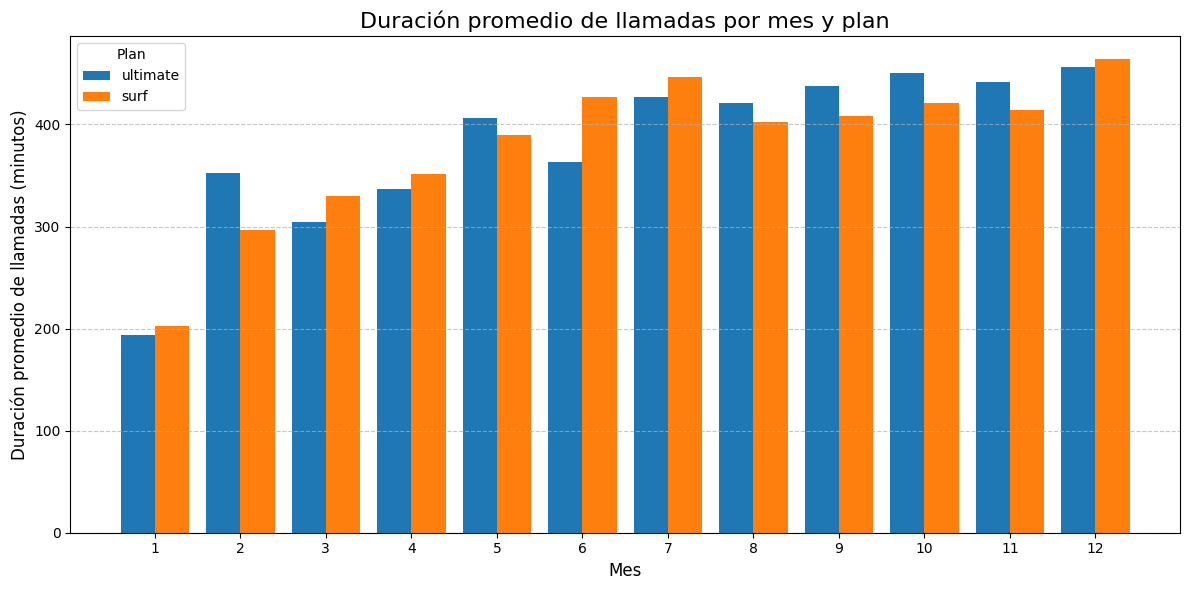

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Crear un DataFrame base con todos los meses (1 a 12) para ambos planes
plans = merged_data_with_plans['plan'].unique()
months = range(1, 13)
base = pd.DataFrame([(plan, month) for plan in plans for month in months], columns=['plan', 'month'])

# Calcular la duración promedio de llamadas por plan y mes
average_call_duration = merged_data_with_plans.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Hacer un merge con el DataFrame base para incluir todos los meses y planes
average_call_duration = pd.merge(base, average_call_duration, on=['plan', 'month'], how='left')

# Rellenar los valores faltantes con 0
average_call_duration['total_minutes'].fillna(0, inplace=True)

# Crear un gráfico con barras agrupadas para cada mes
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Obtener los datos separados por plan
bar_width = 0.4  # Ancho de cada barra
x = np.arange(len(months))  # Posiciones base para cada mes

# Agregar barras para cada plan
for i, plan in enumerate(plans):
    plan_data = average_call_duration[average_call_duration['plan'] == plan]
    plt.bar(x + i * bar_width, plan_data['total_minutes'], width=bar_width, label=plan)

# Configurar etiquetas y título del gráfico
plt.title('Duración promedio de llamadas por mes y plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Duración promedio de llamadas (minutos)', fontsize=12)
plt.xticks(ticks=x + bar_width / 2, labels=months)  # Centrar las etiquetas de los meses
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



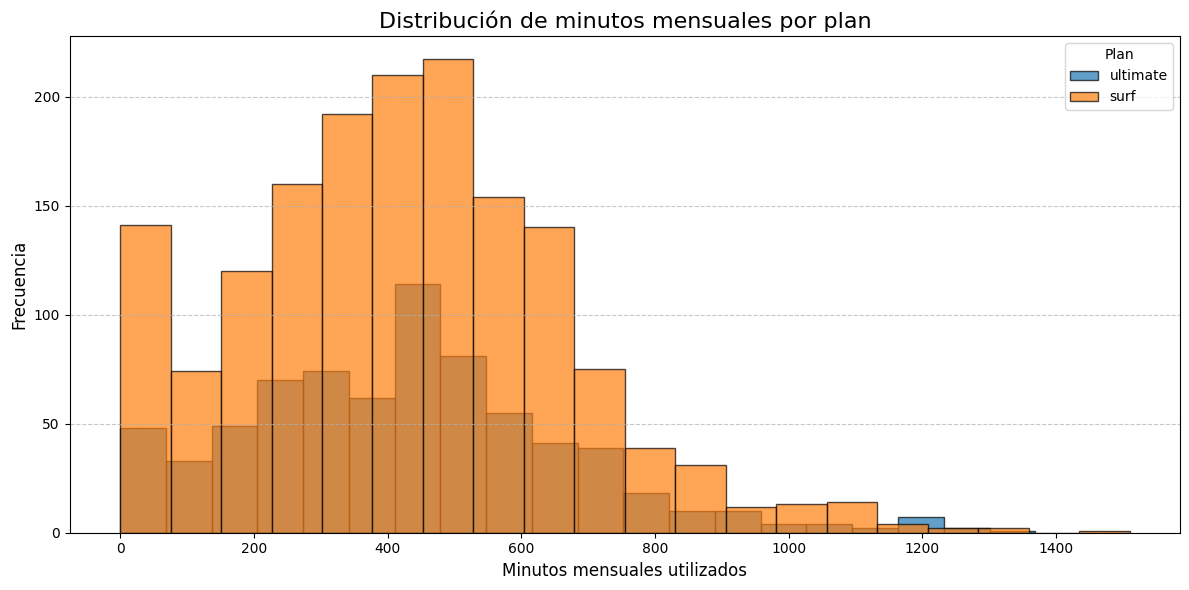

In [31]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Crear un histograma para comparar el número de minutos mensuales entre los planes
plt.figure(figsize=(12, 6))

# Filtrar los datos por plan y trazar el histograma
for plan in merged_data_with_plans['plan'].unique():
    plan_data = merged_data_with_plans[merged_data_with_plans['plan'] == plan]
    plt.hist(plan_data['total_minutes'], bins=20, alpha=0.7, label=plan, edgecolor='black')

# Configurar etiquetas y título del gráfico
plt.title('Distribución de minutos mensuales por plan', fontsize=16)
plt.xlabel('Minutos mensuales utilizados', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el histograma
plt.show()



In [32]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Calcular la media y la varianza de la duración mensual de llamadas separadas por plan
plan_statistics = merged_data_with_plans.groupby('plan')['total_minutes'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para mayor claridad
plan_statistics.rename(columns={'mean': 'mean_minutes', 'var': 'variance_minutes'}, inplace=True)

# Mostrar los resultados
plan_statistics




,plan,mean_minutes,variance_minutes
0,surf,421.251093,57167.030663
1,ultimate,428.071823,58543.878652


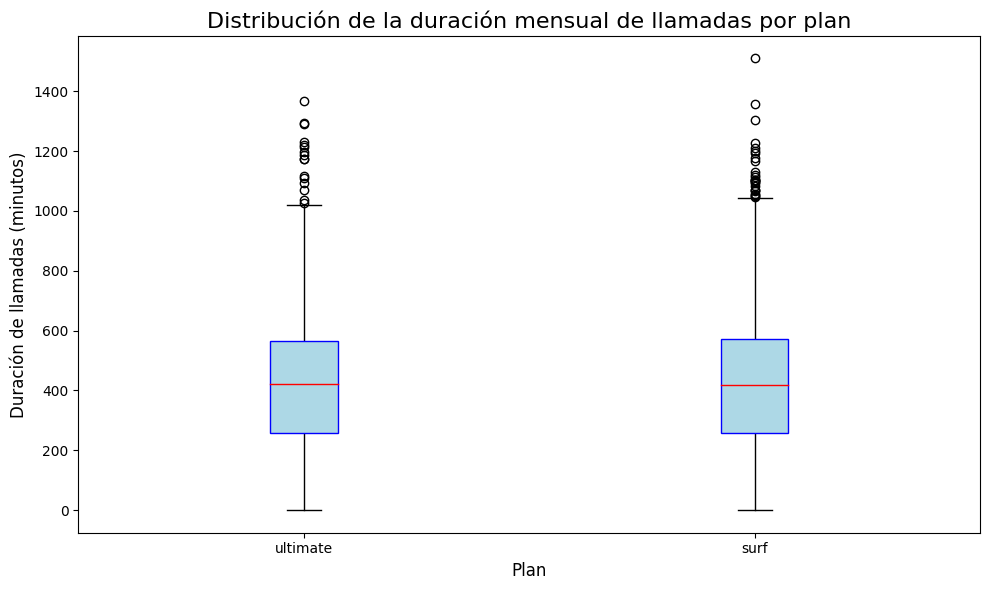

In [33]:
# Crear un diagrama de caja para visualizar la distribución de la duración mensual de llamadas por plan
plt.figure(figsize=(10, 6))
plt.boxplot(
    [merged_data_with_plans[merged_data_with_plans['plan'] == plan]['total_minutes'].dropna() for plan in merged_data_with_plans['plan'].unique()],
    labels=merged_data_with_plans['plan'].unique(),
    patch_artist=True,  # Rellenar el diagrama con color
    boxprops=dict(facecolor='lightblue', color='blue'),  # Estilo de las cajas
    medianprops=dict(color='red')  # Estilo de la mediana
)

# Configurar etiquetas y título
plt.title('Distribución de la duración mensual de llamadas por plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Duración de llamadas (minutos)', fontsize=12)
plt.tight_layout()

# Mostrar el diagrama de caja
plt.show()




1. Diferencias entre los planes:

- los usuarios de surf tienen una media más baja pero una varianza más alta, esto podría indicar que este plan lo eligen tanto usuarios con bajo uso como usuarios que necesitan minutos adicionales pero no quieren pagar por ultimate.
- ultimate tiene una media más alta y varianza más baja, esto podría indicar que los usuarios de este plan tienen un patrón de uso más consistente y suelen hablar más.

2. Satisfacción del plan:

- El diagrama de caja muestra que muchos usuarios de un plan superan los minutos incluidos regularmente, podría ser una señal de que ese plan no satisface completamente las necesidades de los usuarios.

3. Estrategias de negocio:

- los usuarios de surf están usando muchos minutos adicionales, se podría recomendar un nuevo plan intermedio o incentivar la migración a ultimate.

### Mensajes

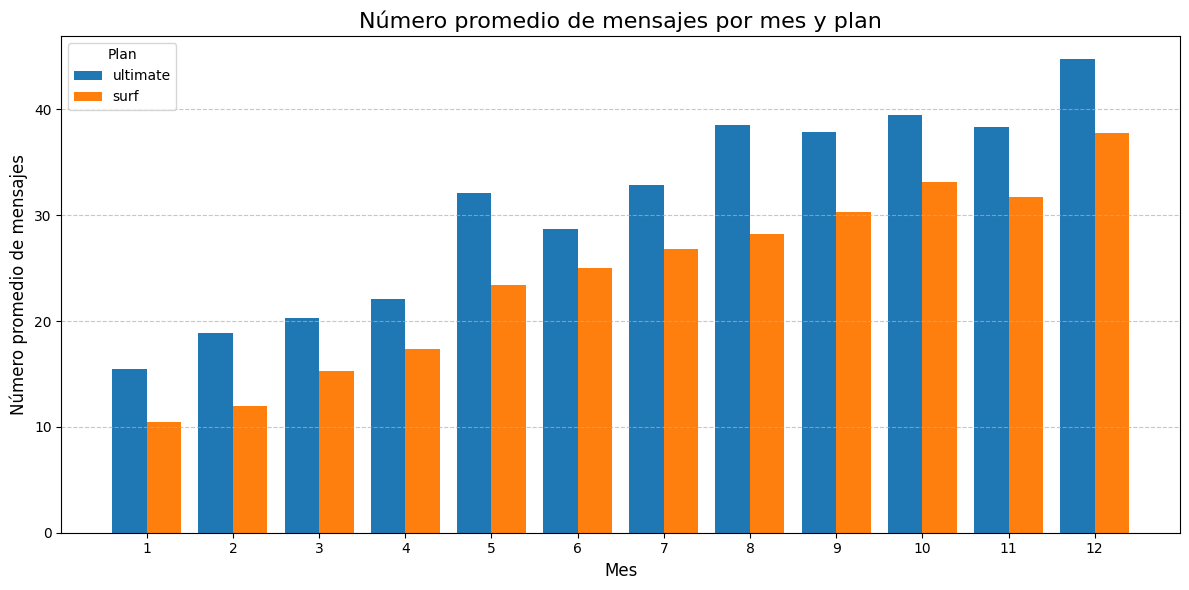

In [34]:

# Calcular el número promedio de mensajes enviados por cada plan y por cada mes
average_messages_per_month = merged_data_with_plans.groupby(['plan', 'month'])['num_messages'].mean().reset_index()

# Crear un DataFrame base con todos los meses (1 a 12) para ambos planes
plans = merged_data_with_plans['plan'].unique()
months = range(1, 13)
base = pd.DataFrame([(plan, month) for plan in plans for month in months], columns=['plan', 'month'])

# Hacer un merge con el DataFrame base para incluir todos los meses y planes
average_messages_per_month = pd.merge(base, average_messages_per_month, on=['plan', 'month'], how='left')

# Rellenar los valores faltantes con 0
average_messages_per_month['num_messages'].fillna(0, inplace=True)

# Crear un gráfico con barras agrupadas para cada mes
plt.figure(figsize=(12, 6))

# Configurar las posiciones de las barras agrupadas
bar_width = 0.4
x = np.arange(len(months))

# Agregar barras para cada plan
for i, plan in enumerate(plans):
    plan_data = average_messages_per_month[average_messages_per_month['plan'] == plan]
    plt.bar(x + i * bar_width, plan_data['num_messages'], width=bar_width, label=plan)

# Configurar etiquetas y título del gráfico
plt.title('Número promedio de mensajes por mes y plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número promedio de mensajes', fontsize=12)
plt.xticks(ticks=x + bar_width / 2, labels=months)  # Centrar las etiquetas de los meses
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



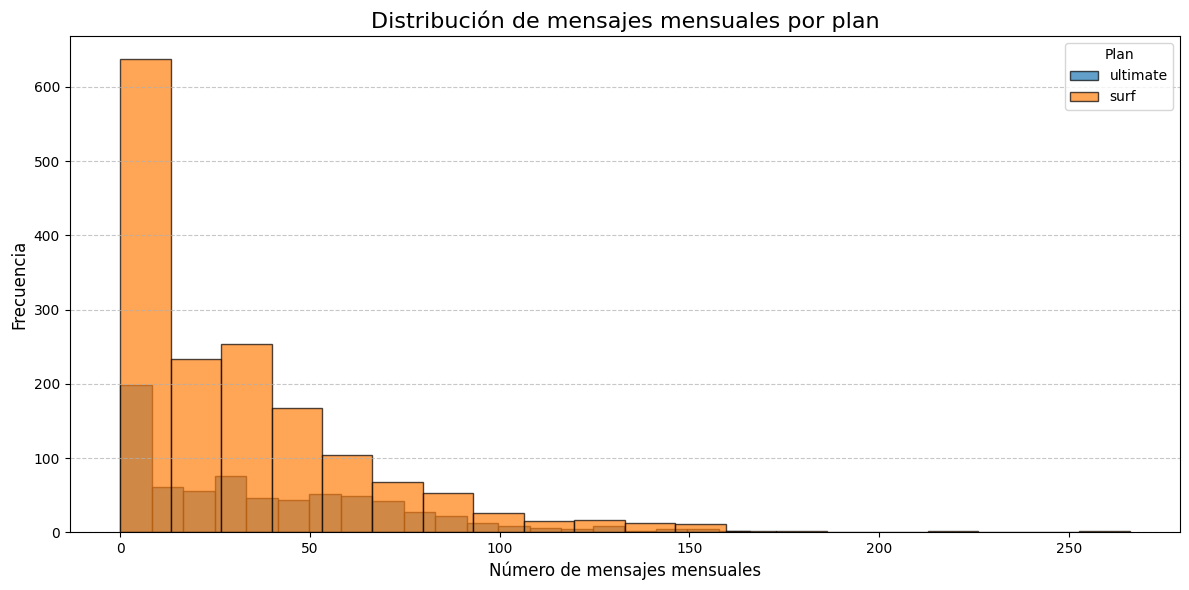

In [35]:
# Crear un histograma para comparar el número de mensajes mensuales entre los planes
plt.figure(figsize=(12, 6))

# Filtrar los datos por plan y trazar el histograma
for plan in merged_data_with_plans['plan'].unique():
    plan_data = merged_data_with_plans[merged_data_with_plans['plan'] == plan]
    plt.hist(plan_data['num_messages'], bins=20, alpha=0.7, label=plan, edgecolor='black')

# Configurar etiquetas y título del gráfico
plt.title('Distribución de mensajes mensuales por plan', fontsize=16)
plt.xlabel('Número de mensajes mensuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el histograma
plt.show()




In [36]:
# Calcular la media y la varianza del número de mensajes enviados por cada plan
messages_stats_by_plan = merged_data_with_plans.groupby('plan')['num_messages'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para mayor claridad
messages_stats_by_plan.rename(columns={'mean': 'mean_messages', 'var': 'variance_messages'}, inplace=True)

# Mostrar los resultados
messages_stats_by_plan


,plan,mean_messages,variance_messages
0,surf,30.614616,1123.700761
1,ultimate,37.343923,1209.827612


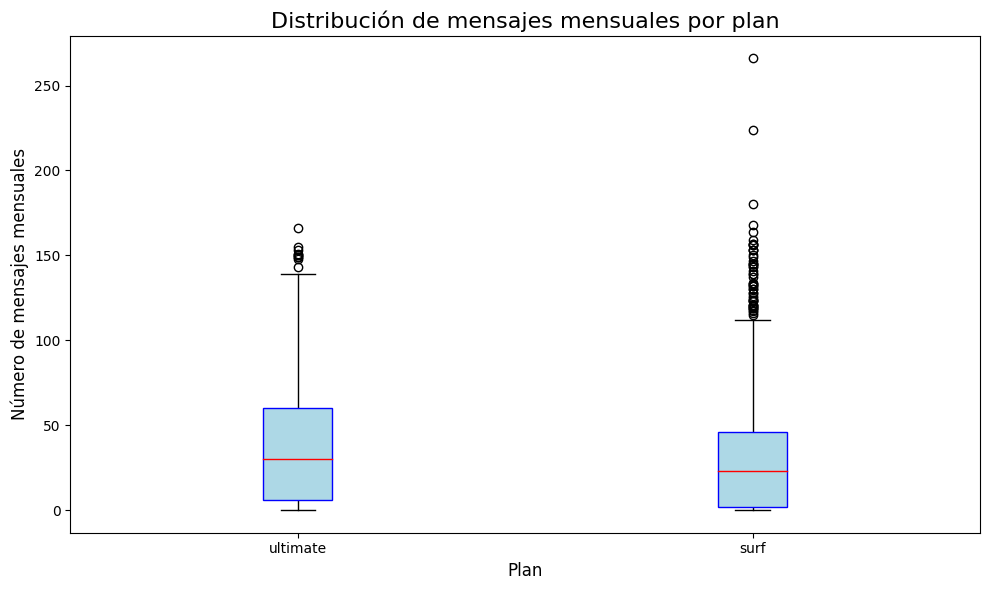

In [37]:
# Crear un diagrama de caja para visualizar la distribución de la cantidad de mensajes por plan
plt.figure(figsize=(10, 6))
plt.boxplot(
    [merged_data_with_plans[merged_data_with_plans['plan'] == plan]['num_messages'].dropna() for plan in merged_data_with_plans['plan'].unique()],
    labels=merged_data_with_plans['plan'].unique(),
    patch_artist=True,  # Rellenar el diagrama con color
    boxprops=dict(facecolor='lightblue', color='blue'),  # Estilo de las cajas
    medianprops=dict(color='red')  # Estilo de la mediana
)

# Configurar etiquetas y título
plt.title('Distribución de mensajes mensuales por plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Número de mensajes mensuales', fontsize=12)
plt.tight_layout()

# Mostrar el diagrama de caja
plt.show()


1. Media de mensajes:

* Los usuarios del plan Ultimate envían más mensajes en promedio (37.34) que los usuarios del plan Surf (30.61).

2. Varianza:

* La varianza es ligeramente mayor en Ultimate (1209.83) que en Surf (1123.70), lo que indica que los usuarios de Ultimate tienen un rango de uso de mensajes más disperso.

3. Distribución en el diagrama de caja:

* Surf: Tiene una mediana más baja y una distribución más concentrada hacia valores bajos de mensajes enviados.
Ultimate: Muestra una mediana más alta y una mayor presencia de usuarios que envían más mensajes.

4. Comportamiento por plan:

* Surf: Parece preferido por usuarios con un uso moderado o bajo de mensajes.
* Ultimate: Es más adecuado para usuarios con un uso mayor de mensajes, como sugiere la mediana más alta.

### Internet

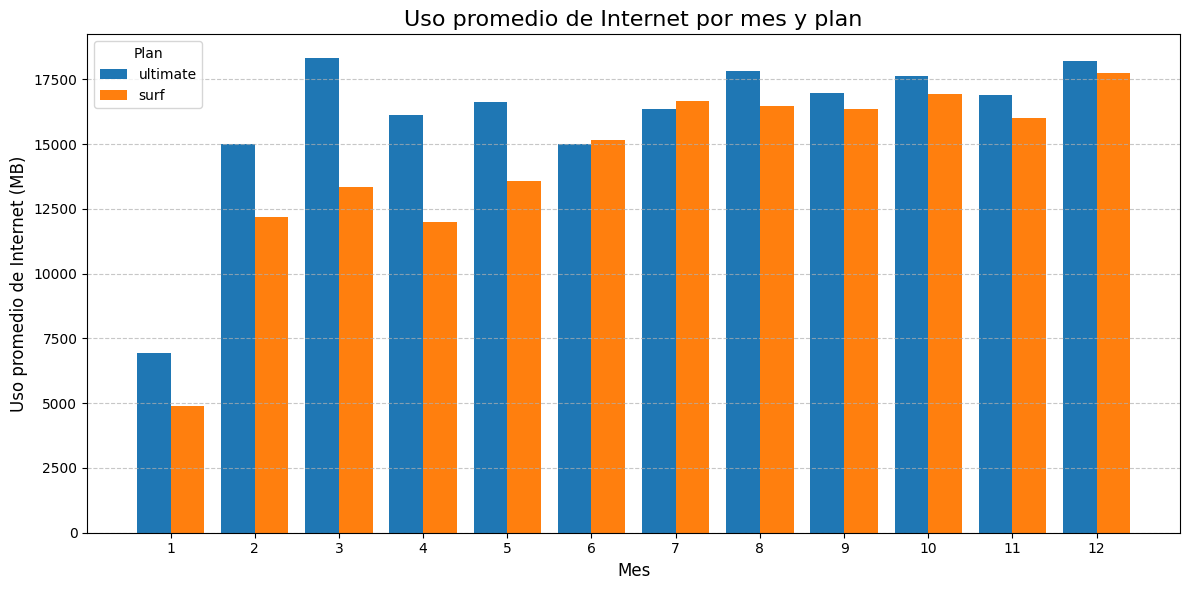

In [38]:
# Calcular el uso promedio de Internet por cada plan y por cada mes
average_internet_per_month = merged_data_with_plans.groupby(['plan', 'month'])['total_mb_used'].mean().reset_index()

# Crear un DataFrame base con todos los meses (1 a 12) para ambos planes
plans = merged_data_with_plans['plan'].unique()
months = range(1, 13)
base = pd.DataFrame([(plan, month) for plan in plans for month in months], columns=['plan', 'month'])

# Hacer un merge con el DataFrame base para incluir todos los meses y planes
average_internet_per_month = pd.merge(base, average_internet_per_month, on=['plan', 'month'], how='left')

# Rellenar los valores faltantes con 0
average_internet_per_month['total_mb_used'].fillna(0, inplace=True)

# Crear un gráfico con barras agrupadas para cada mes
plt.figure(figsize=(12, 6))

# Configurar las posiciones de las barras agrupadas
bar_width = 0.4
x = np.arange(len(months))

# Agregar barras para cada plan
for i, plan in enumerate(plans):
    plan_data = average_internet_per_month[average_internet_per_month['plan'] == plan]
    plt.bar(x + i * bar_width, plan_data['total_mb_used'], width=bar_width, label=plan)

# Configurar etiquetas y título del gráfico
plt.title('Uso promedio de Internet por mes y plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Uso promedio de Internet (MB)', fontsize=12)
plt.xticks(ticks=x + bar_width / 2, labels=months)  # Centrar las etiquetas de los meses
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


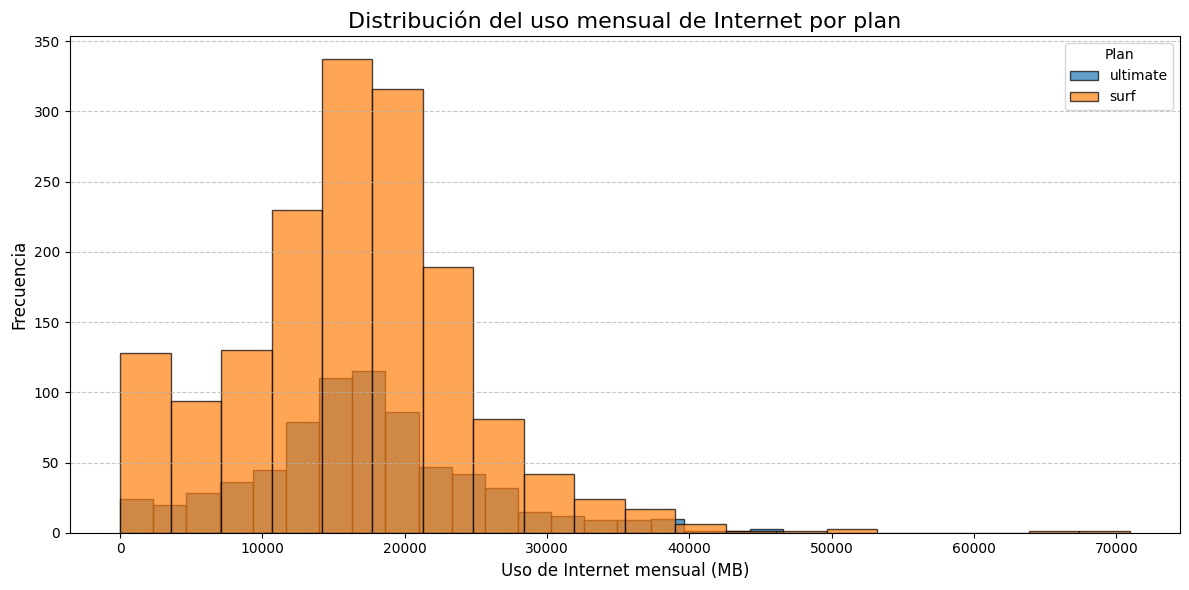

In [39]:
# Crear un histograma para comparar el uso mensual de Internet entre los planes
plt.figure(figsize=(12, 6))

# Filtrar los datos por plan y trazar el histograma
for plan in merged_data_with_plans['plan'].unique():
    plan_data = merged_data_with_plans[merged_data_with_plans['plan'] == plan]
    plt.hist(plan_data['total_mb_used'], bins=20, alpha=0.7, label=plan, edgecolor='black')

# Configurar etiquetas y título del gráfico
plt.title('Distribución del uso mensual de Internet por plan', fontsize=16)
plt.xlabel('Uso de Internet mensual (MB)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el histograma
plt.show()


In [40]:
# Calcular la media y la varianza del uso de Internet por cada plan
internet_stats_by_plan = merged_data_with_plans.groupby('plan')['total_mb_used'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para mayor claridad
internet_stats_by_plan.rename(columns={'mean': 'mean_internet_mb', 'var': 'variance_internet_mb'}, inplace=True)

# Mostrar los resultados
print(internet_stats_by_plan)


       plan  mean_internet_mb  variance_internet_mb
0      surf      16268.694522          6.780679e+07
1  ultimate      17119.590856          6.294168e+07


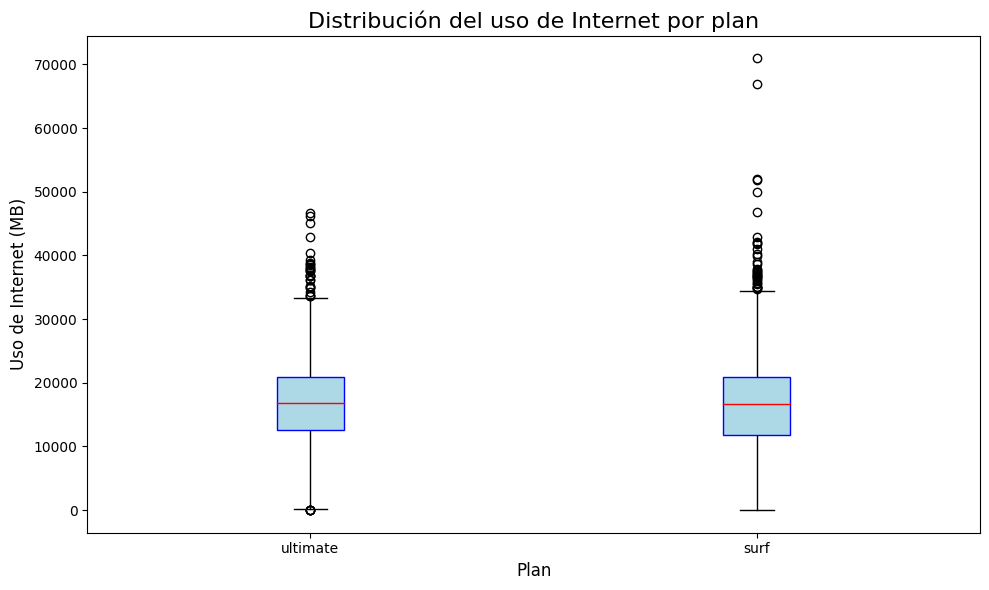

In [41]:
# Crear un diagrama de caja para visualizar la distribución del uso de Internet por plan
plt.figure(figsize=(10, 6))
plt.boxplot(
    [merged_data_with_plans[merged_data_with_plans['plan'] == plan]['total_mb_used'].dropna() for plan in merged_data_with_plans['plan'].unique()],
    labels=merged_data_with_plans['plan'].unique(),
    patch_artist=True,  # Rellenar el diagrama con color
    boxprops=dict(facecolor='lightblue', color='blue'),  # Estilo de las cajas
    medianprops=dict(color='red')  # Estilo de la mediana
)

# Configurar etiquetas y título
plt.title('Distribución del uso de Internet por plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Uso de Internet (MB)', fontsize=12)
plt.tight_layout()

# Mostrar el diagrama de caja
plt.show()


1. Consumo promedio por plan:

* Los usuarios del plan Ultimate consumen más tráfico de Internet en promedio (17,119 MB) que los usuarios del plan Surf (16,268 MB).
* Esto sugiere que el plan Ultimate es más atractivo para usuarios que necesitan un consumo de datos más elevado.

2. Distribución del consumo:

* El rango intercuartil (IQR) del plan Ultimate es más alto, lo que significa que los usuarios de este plan tienen patrones de consumo más consistentes hacia valores más altos.
* Por otro lado, el consumo en Surf es más variable, con algunos usuarios que consumen cantidades significativamente más bajas de datos.

3. Valores atípicos:

* En ambos planes hay usuarios que destacan como valores atípicos debido a su alto consumo de Internet, lo que podría indicar:
* Que están pagando costos adicionales por exceder los límites del plan.
* Una oportunidad para ajustar los planes o promocionar upgrades.

4. Diferencias clave entre los planes:

* Ultimate: Los usuarios tienden a consumir más datos y lo hacen de manera más constante. Este plan parece adecuado para usuarios con necesidades de datos más elevadas.
* Surf: Tiene un grupo más variado de usuarios, desde quienes consumen muy pocos datos hasta algunos que utilizan niveles de datos similares a Ultimate.

5. Varianza del consumo:

* Aunque ambos planes tienen alta varianza, la del plan Surf es ligeramente mayor. Esto podría indicar que algunos usuarios de Surf están forzando los límites del plan, posiblemente generando costos adicionales por exceso de datos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

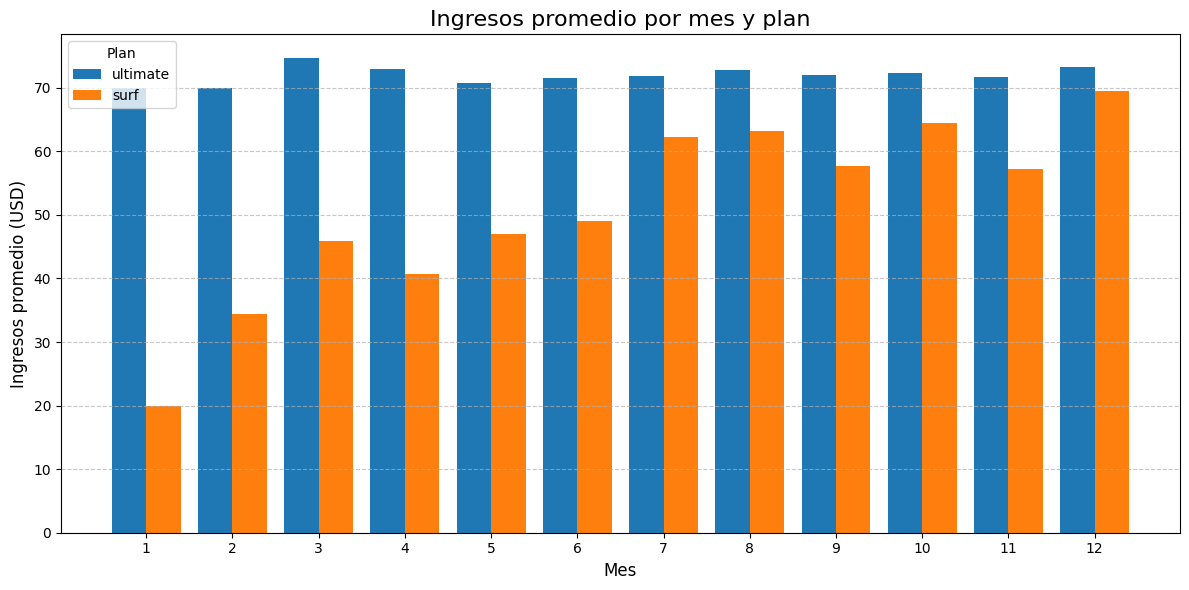

In [42]:
# Calcular los ingresos promedio por plan y por mes
average_revenue_per_month = merged_data_with_plans.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()

# Crear un DataFrame base con todos los meses (1 a 12) para ambos planes
plans = merged_data_with_plans['plan'].unique()
months = range(1, 13)
base = pd.DataFrame([(plan, month) for plan in plans for month in months], columns=['plan', 'month'])

# Hacer un merge con el DataFrame base para incluir todos los meses y planes
average_revenue_per_month = pd.merge(base, average_revenue_per_month, on=['plan', 'month'], how='left')

# Rellenar los valores faltantes con 0
average_revenue_per_month['monthly_revenue'].fillna(0, inplace=True)

# Crear un gráfico con barras agrupadas para cada mes
plt.figure(figsize=(12, 6))

# Configurar las posiciones de las barras agrupadas
bar_width = 0.4
x = np.arange(len(months))

# Agregar barras para cada plan
for i, plan in enumerate(plans):
    plan_data = average_revenue_per_month[average_revenue_per_month['plan'] == plan]
    plt.bar(x + i * bar_width, plan_data['monthly_revenue'], width=bar_width, label=plan)

# Configurar etiquetas y título del gráfico
plt.title('Ingresos promedio por mes y plan', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingresos promedio (USD)', fontsize=12)
plt.xticks(ticks=x + bar_width / 2, labels=months)  # Centrar las etiquetas de los meses
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


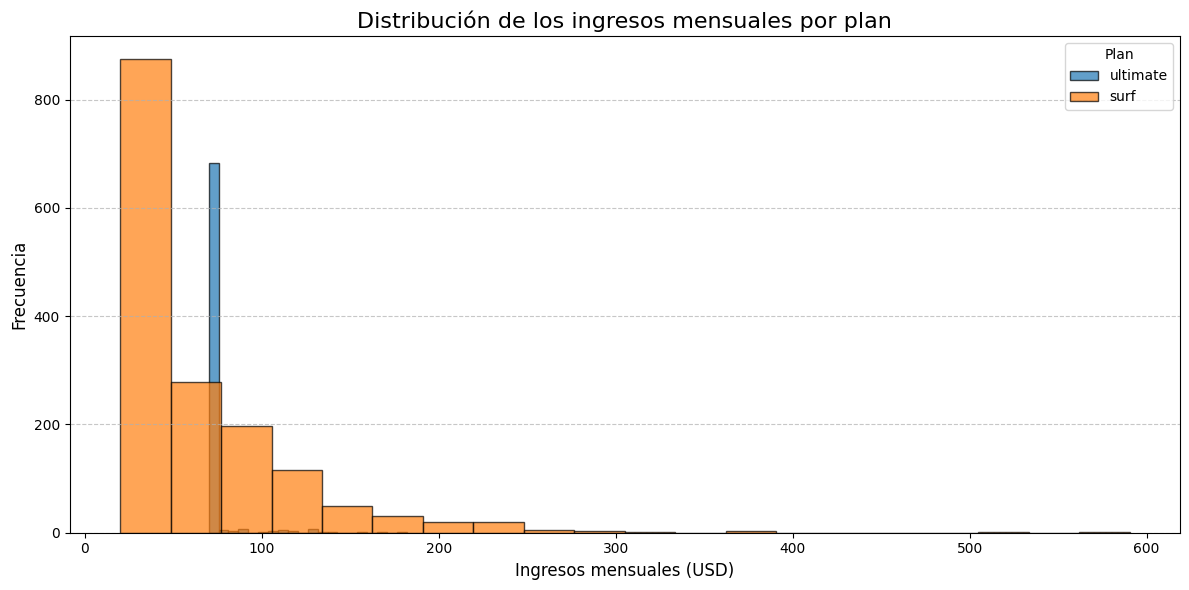

In [43]:
# Crear un histograma para comparar la distribución de ingresos mensuales entre los planes
plt.figure(figsize=(12, 6))

# Filtrar los datos por plan y trazar el histograma
for plan in merged_data_with_plans['plan'].unique():
    plan_data = merged_data_with_plans[merged_data_with_plans['plan'] == plan]
    plt.hist(plan_data['monthly_revenue'], bins=20, alpha=0.7, label=plan, edgecolor='black')

# Configurar etiquetas y título del gráfico
plt.title('Distribución de los ingresos mensuales por plan', fontsize=16)
plt.xlabel('Ingresos mensuales (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el histograma
plt.show()


In [44]:
# Calcular la media y la varianza de los ingresos mensuales por plan
revenue_stats_by_plan = merged_data_with_plans.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para mayor claridad
revenue_stats_by_plan.rename(columns={'mean': 'mean_revenue', 'var': 'variance_revenue'}, inplace=True)

# Mostrar los resultados
revenue_stats_by_plan


,plan,mean_revenue,variance_revenue
0,surf,59.994491,3040.982973
1,ultimate,72.301105,129.159556


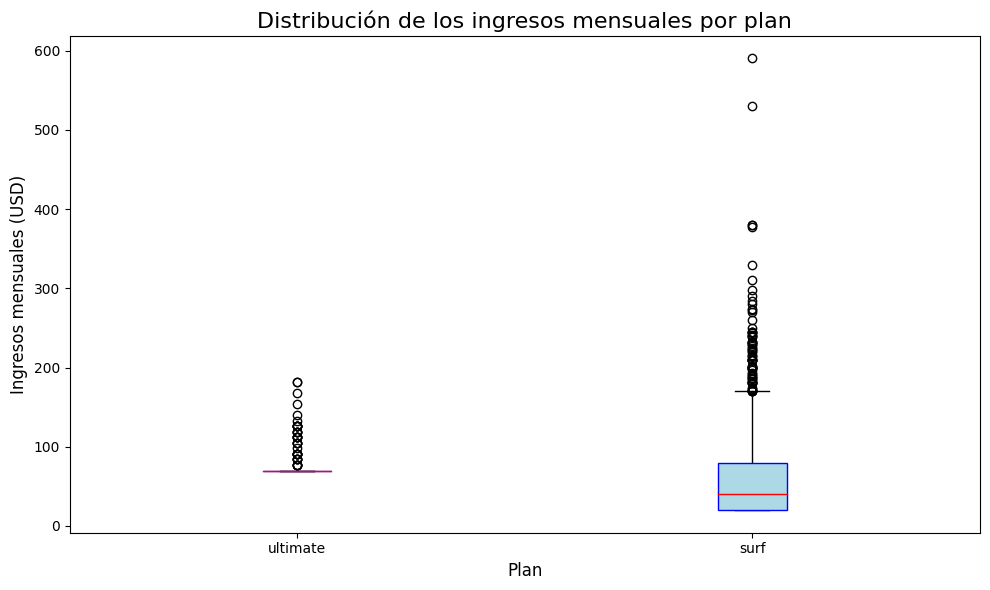

In [45]:
# Crear un diagrama de caja para visualizar la distribución de los ingresos por plan
plt.figure(figsize=(10, 6))
plt.boxplot(
    [merged_data_with_plans[merged_data_with_plans['plan'] == plan]['monthly_revenue'].dropna() for plan in merged_data_with_plans['plan'].unique()],
    labels=merged_data_with_plans['plan'].unique(),
    patch_artist=True,  # Rellenar el diagrama con color
    boxprops=dict(facecolor='lightblue', color='blue'),  # Estilo de las cajas
    medianprops=dict(color='red')  # Estilo de la mediana
)

# Configurar etiquetas y título
plt.title('Distribución de los ingresos mensuales por plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Ingresos mensuales (USD)', fontsize=12)
plt.tight_layout()

# Mostrar el diagrama de caja
plt.show()


1. Ingreso promedio:

* El plan Ultimate genera un ingreso promedio más alto (72.30 USD) que Surf (59.99 USD).
Esto refleja la naturaleza premium del plan Ultimate, que incluye más servicios en su tarifa básica.

2. Varianza:

* La varianza en Surf es mucho mayor (3040.98) en comparación con Ultimate (129.16). Esto indica que los ingresos de Surf dependen más de cargos adicionales (por ejemplo, excedentes en minutos, mensajes o Internet), mientras que los ingresos de Ultimate son más consistentes.

3. Distribución:

* Los ingresos de Ultimate están más concentrados, lo que sugiere que la mayoría de los usuarios pagan una tarifa similar, probablemente debido a menos excedentes.

* Los ingresos de Surf muestran una mayor dispersión, lo que puede deberse a usuarios con comportamientos de consumo variados (algunos exceden los límites del plan y generan cargos adicionales).




## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Prueba las hipótesis
from scipy import stats as st

# Definir los datos: ingresos por plan
revenue_surf = merged_data_with_plans[merged_data_with_plans['plan'] == 'surf']['monthly_revenue']
revenue_ultimate = merged_data_with_plans[merged_data_with_plans['plan'] == 'ultimate']['monthly_revenue']

# Nivel de significancia
alpha = 0.05

# Realizar la prueba t para muestras independientes
results = st.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)

# Prueba de dos colas
print("Valor-p (prueba de dos colas): ", results.pvalue)

# Decisión de la hipótesis
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio entre los planes son significativamente diferentes")
else:
    print("No podemos rechazar la hipótesis nula: los ingresos promedio entre los planes no son significativamente diferentes")



Valor-p (prueba de dos colas):  2.7836646515264525e-17
Rechazamos la hipótesis nula: los ingresos promedio entre los planes son significativamente diferentes


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [47]:

# Paso 1: Fusionar df_users con merged_data_with_plans
merged_with_cities = merged_data_with_plans.merge(df_users[['user_id', 'city']], on='user_id', how='left')

# Paso 2: Filtrar usuarios de NY-NJ usando tanto "New York" como "New Jersey"
ny_nj_cities = ['New York', 'New Jersey']
revenue_ny_nj = merged_with_cities[merged_with_cities['city'].str.contains('|'.join(ny_nj_cities))]['monthly_revenue']
revenue_other_regions = merged_with_cities[~merged_with_cities['city'].str.contains('|'.join(ny_nj_cities))]['monthly_revenue']

# Paso 3: Prueba t de Student para comparar los ingresos
alpha = 0.05
results = st.ttest_ind(revenue_ny_nj, revenue_other_regions, equal_var=False)

# Mostrar los resultados
print("Valor-p (prueba de dos colas):", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio de NY-NJ son significativamente diferentes a los de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencias significativas en los ingresos promedio entre NY-NJ y otras regiones.")


Valor-p (prueba de dos colas): 0.03221678872771619
Rechazamos la hipótesis nula: los ingresos promedio de NY-NJ son significativamente diferentes a los de otras regiones.


## Conclusión general

1.Limpieza y procesamiento de datos: 
* Redondeamos la duración de las llamadas hacia el minuto superior, ya que la empresa cobra por minuto completo.
* Redondeamos el tráfico de Internet al gigabyte superior al total mensual, siguiendo la política de la empresa.
* Creamos nuevas columnas para extraer el mes de las fechas y organizar mejor los datos por período.
* Fusionamos múltiples tablas relacionadas (llamadas, mensajes, Internet, planes, usuarios) en un único DataFrame para facilitar el análisis.
* Los datos ausentes en las fechas de baja de los usuarios (churn_date) indicaban que el cliente estaba activo en la fecha de extracción de los datos.

2. . Comportamiento de los usuarios

* Llamadas:

El análisis mostró que los usuarios del plan Ultimate realizan llamadas más largas en promedio que los del plan Surf.
Las varianzas de la duración de las llamadas sugieren un rango de comportamientos más disperso en el plan Surf, mientras que el plan Ultimate tiene una distribución más consistente.

Los diagramas de caja revelaron valores atípicos en ambos planes, lo que sugiere algunos usuarios que realizan llamadas significativamente más largas.

* Mensajes:

Los usuarios del plan Ultimate envían más mensajes en promedio que los del plan Surf.

Aunque el plan Surf tiene una mayor dispersión en el número de mensajes enviados, la mayoría de los usuarios se concentran en valores bajos.

* Internet:

El plan Ultimate atrae a usuarios con un mayor consumo promedio de datos.

La varianza en el consumo de Internet también es más alta en el plan Surf, lo que indica una mayor diversidad en los hábitos de uso entre sus usuarios.

3. Ingresos generados por los planes

* El plan Ultimate genera ingresos promedio más altos ($72.30) que el plan Surf ($59.99).

La varianza de los ingresos en Surf es mucho mayor (3040.98), indicando que los ingresos en este plan dependen más de los cargos adicionales (excedentes).

Patrones mensuales: Los ingresos promedio por mes son consistentes para ambos planes. Sin embargo, los ingresos de Ultimate se concentran en valores más altos debido a su tarifa base más elevada y un menor número de cargos adicionales.

4. Se realizaron varias pruebas de hipótesis para evaluar diferencias significativas entre grupos:

* Comparación de ingresos entre planes Surf y Ultimate:

Hipótesis nula (Ho): Los ingresos promedio entre Surf y Ultimate son iguales.
Resultado: Se rechazó (Ho) p<0.05),  concluyendo que los ingresos promedio de los planes son significativamente diferentes.

* Ingresos entre regiones (NY-NJ vs otras):

**Hipótesis nula (Ho):** Los ingresos promedio de usuarios de NY-NJ no difieren de los de otras regiones.
**Resultado:** Se rechazó (Ho) p<0.0322), indicando que los ingresos de los usuarios de NY-NJ son significativamente diferentes.

**Decisiones importantes:**Elegimos pruebas de dos colas para evaluar diferencias sin asumir direcciones específicas en las hipótesis.

5. Recomendaciones estratégicas

**Planes:**
* El plan Ultimate genera ingresos más altos de manera consistente. Se podría promover entre usuarios de Surf con altos consumos de llamadas, mensajes o datos.
* Crear un plan intermedio entre Surf y Ultimate podría cubrir mejor las necesidades de los usuarios de Surf que exceden sus límites.

**Regiones:**
* Analizar los factores específicos que influyen en los ingresos más altos de los usuarios de NY-NJ para replicar estrategias en otras regiones.

**Conclusión general**

El análisis reveló diferencias significativas entre los planes de la empresa en términos de comportamiento de los usuarios e ingresos generados. Estas diferencias destacan la necesidad de segmentar mejor a los clientes y ajustar los planes o las estrategias de marketing para maximizar los ingresos.
